In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
data = pd.read_csv('employees_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# target variable is attrition indicating if employee is in company or not
# 1 implies employee has left the company
# 0 implies employee is in the company

In [4]:
ohe = pd.get_dummies(data, drop_first=True)

y = 'Attrition'
x = ohe.columns.drop(y)


xtrain, xtest, ytrain, ytest = train_test_split(ohe[x], ohe[y], test_size=.2, random_state=1)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1176, 47), (1176,), (294, 47), (294,))

# Simple Decision Tree Classifier

In [5]:
dt = DecisionTreeClassifier(max_depth=3).fit(xtrain,ytrain)

In [6]:
from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=list(xtrain.columns))
print(tree_rules)

|--- OverTime_Yes <= 0.50
|   |--- TotalWorkingYears <= 2.50
|   |   |--- JobRole_Research Scientist <= 0.50
|   |   |   |--- class: 0
|   |   |--- JobRole_Research Scientist >  0.50
|   |   |   |--- class: 0
|   |--- TotalWorkingYears >  2.50
|   |   |--- YearsAtCompany <= 31.50
|   |   |   |--- class: 0
|   |   |--- YearsAtCompany >  31.50
|   |   |   |--- class: 1
|--- OverTime_Yes >  0.50
|   |--- MonthlyIncome <= 3751.50
|   |   |--- MaritalStatus_Single <= 0.50
|   |   |   |--- class: 0
|   |   |--- MaritalStatus_Single >  0.50
|   |   |   |--- class: 1
|   |--- MonthlyIncome >  3751.50
|   |   |--- JobRole_Sales Executive <= 0.50
|   |   |   |--- class: 0
|   |   |--- JobRole_Sales Executive >  0.50
|   |   |   |--- class: 0



## Plot the whole decision tree

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

def drawtree(tree_name,training_cols):
    plt.figure(figsize=(50,10))
    tree.plot_tree(tree_name, feature_names=training_cols,filled=True) # 'plot_tree' a method of tree library

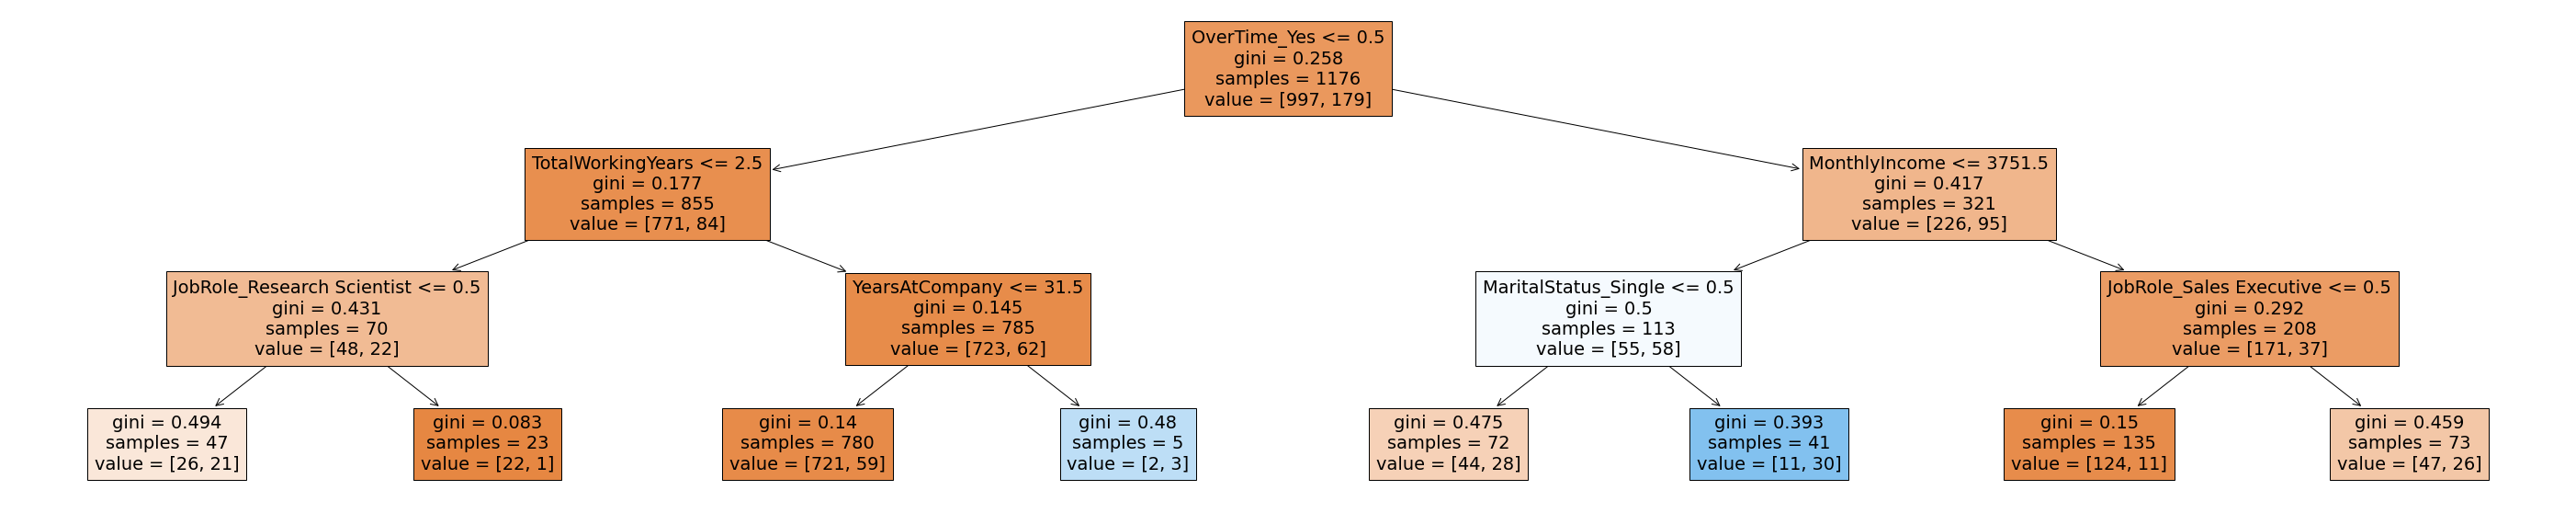

In [9]:
drawtree(dt,xtrain.columns)

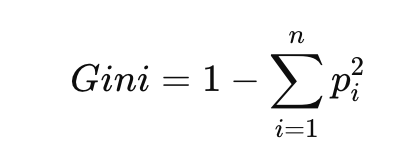

# pi is the proportion of instances belonging to class 𝑖 in the node, and n is the number of classes.

# let's take an example of landslide occurrence or non-occurrence
# landslide occurrence due to rainfall (categories: light, heavy)
# landslide occurrence due to slope angle (categories: mild, steep)

# Suppose I have 10 landslides, 6 cases of landslide (1) and 4 cases of non-landslide (0)

# proportion of landslide = 6/10 = 0.6
# proportion of non-landslide = 4/10 = 0.4

# Gini for the complete data = 1 - (0.6x0.6 + 0.4x0.4) = 0.48

# To decide where to split: 
# Split 1 (light rainfall): landslide = 2, non-landslide = 4
# proportion of landslide = 2/6 = 0.33
# proportion of non-landslide = 4/6 = 0.66
# Gini (light rainfall) = 1-(0.33x0.33 + 0.66x0.66) = 0.45

# Split 2 (heavy rainfall): landslide = 3, non-landslide = 1
# proportion of landslide = 3/4 = 0.75
# proportion of non-landslide = 1/4 = 0.25
# Gini (heavy rainfall) = 1-(0.75x0.75 + 0.25x0.25) = 0.375

# weights: light rainfall = 6/10 = 0.6 ; heavy rainfall = 4/10=0.4

# weighted Gini = 0.6x0.45 + 0.4x0.375 = 0.42

# The initial Gini impurity was 0.48. Gini impurity based on splitting with rainfall is 0.42. This indicates that splitting is better with rainfall since Gini reduced in value. 


# Building Random Forest Classifier

In [10]:
rf = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=1).fit(xtrain, ytrain) 
# n_estimators: no of trees to build

In [11]:
rf.estimators_ # through this we will be able to access those trees and get to know what kind of cols are coming in the root node


[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1791095845),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=2135392491),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=946286476),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1857819720),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=491263)]

In [12]:
rf.estimators_[0] # accessing tree_0 at index 0 (1st tree)

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1791095845)

# Plot 1st tree from random forest

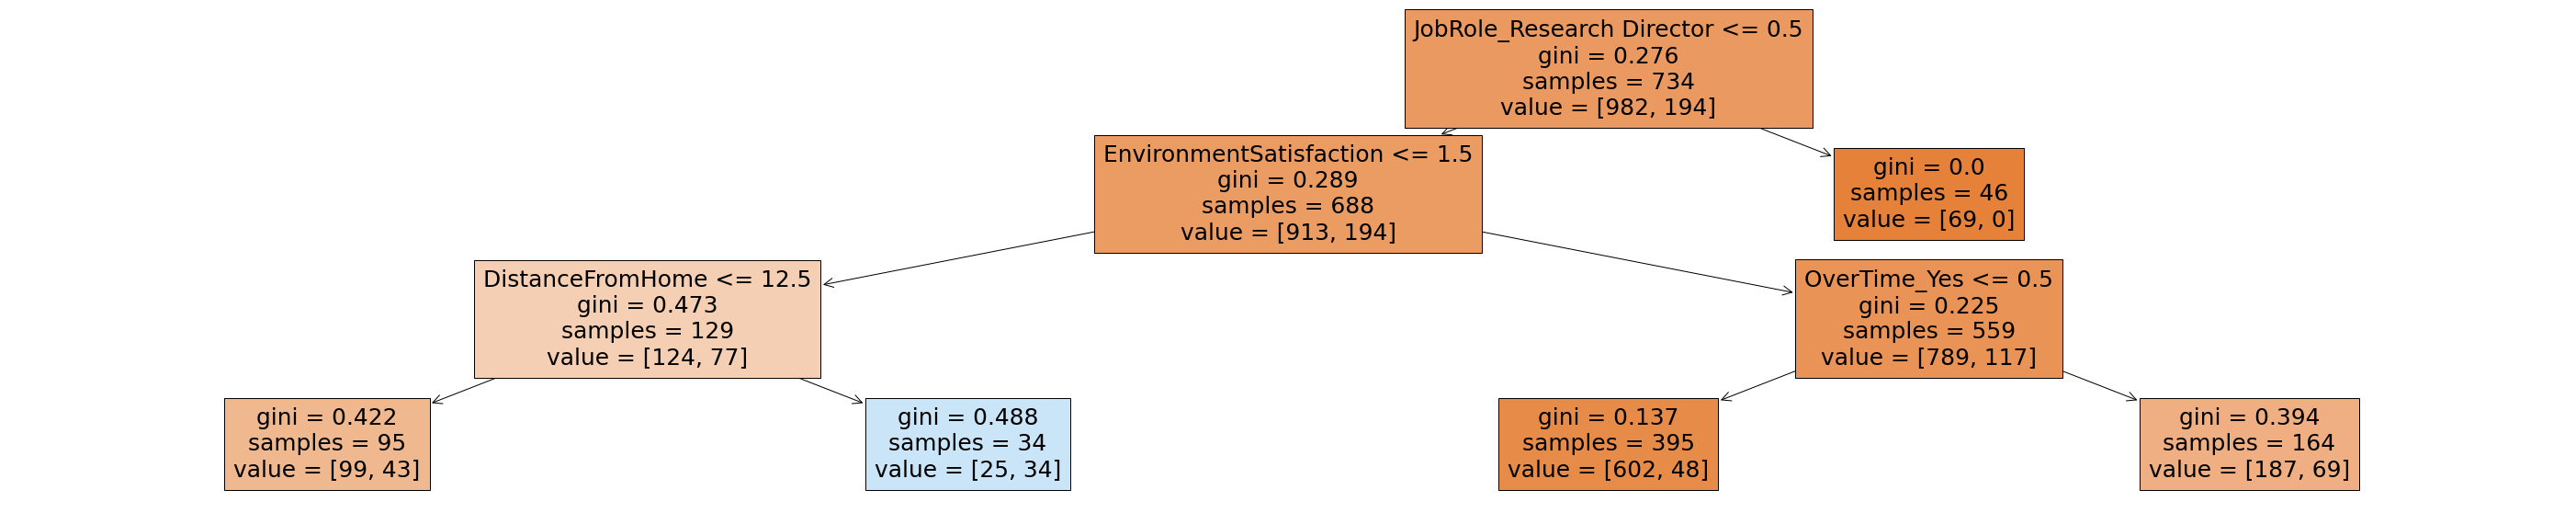

In [13]:
drawtree(rf.estimators_[0],xtrain.columns)

In [14]:
rf.estimators_[1] # accessing tree_1 at index 1 (2nd tree)

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=2135392491)

# Plot 2nd tree from random forest

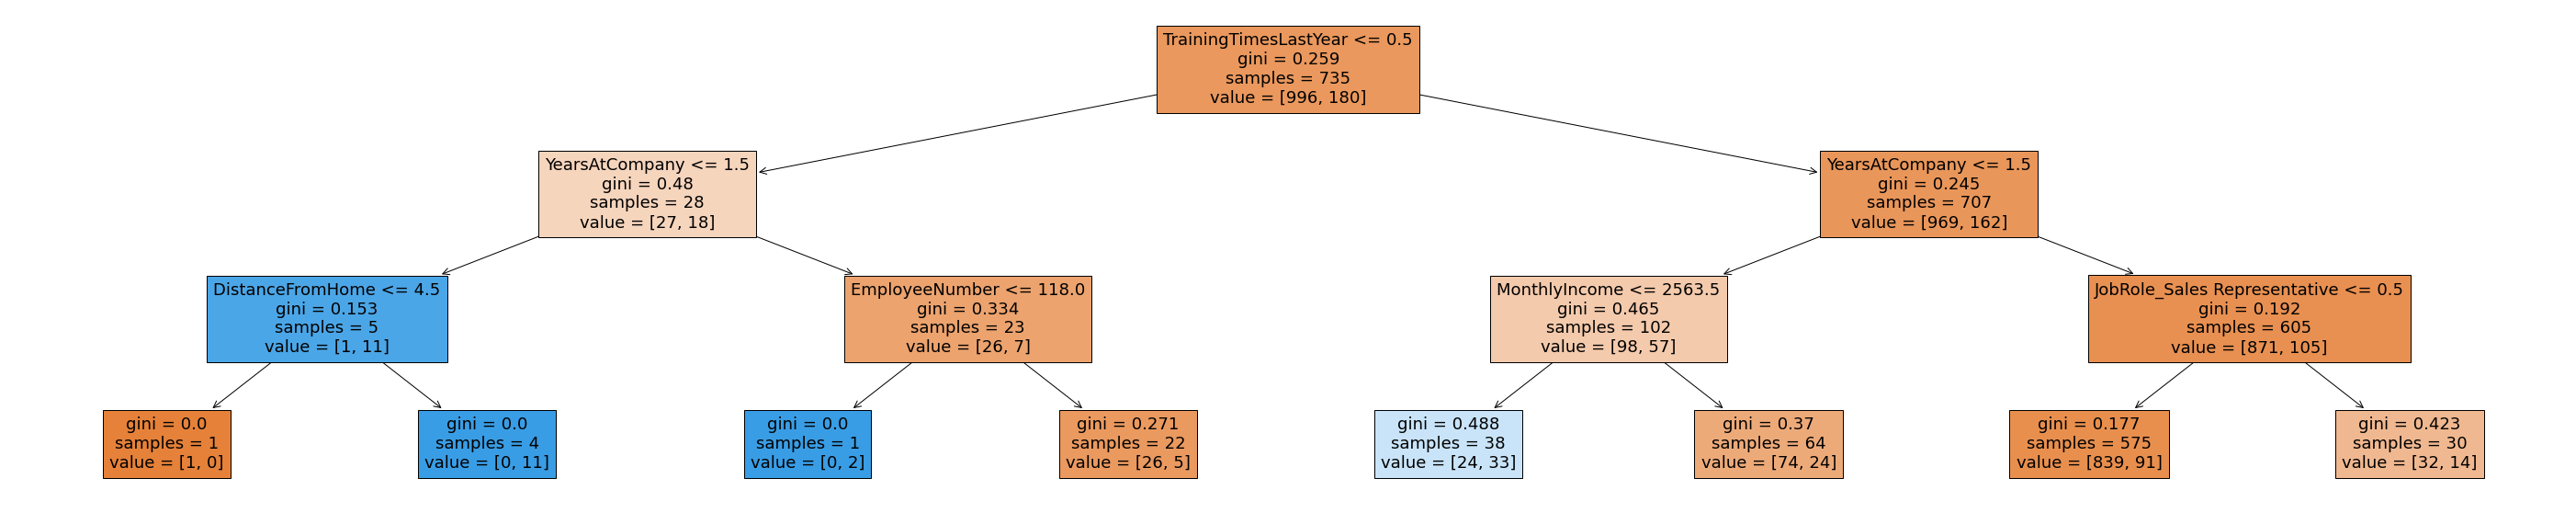

In [15]:
drawtree(rf.estimators_[1],xtrain.columns)

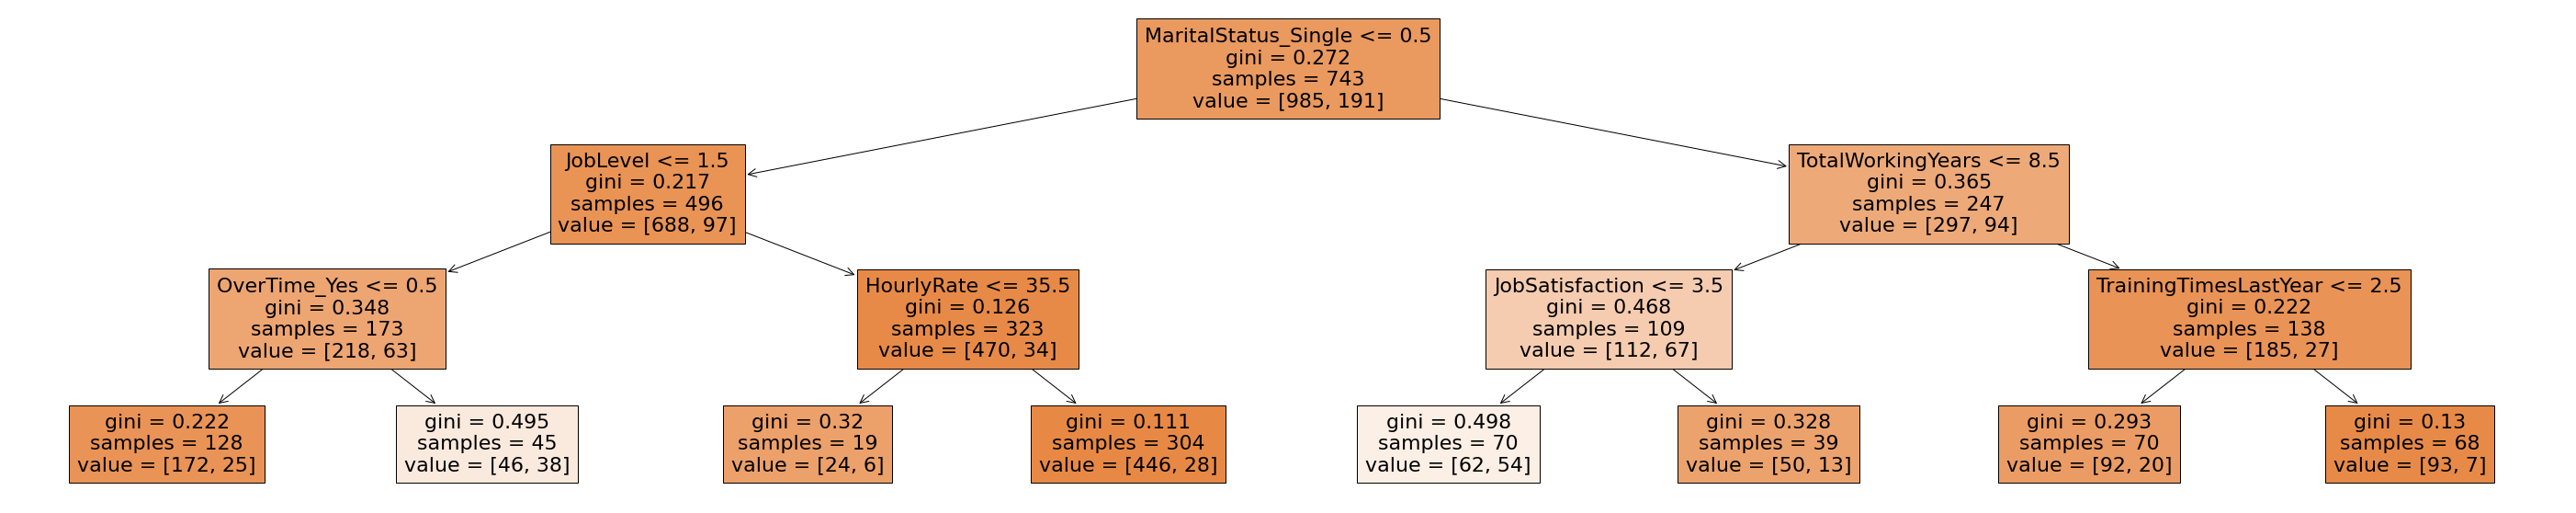

In [16]:
drawtree(rf.estimators_[2],xtrain.columns)

# **Note** -> In all the tree graphs shown above
* At each index of different trees, different columns are coming at each root node based on which subsequent columns at other depths are selected 
* In this way we are giving importance to many columns to be on the root node based on which predictions can happen 
* Which brings out a lot of insight from our data because we try to explore multiple columns from different set of rows 

**max_depth** - We shouldn't specify this parameter but if we don't specify, we will get a very large depth of tree which will be difficult to build, compute and visualize.
* We can use '**.feature_importances_**' to know what kind of important columns we will get in the actual process of a particular decision tree of random forest
* **Importance** is calc based on how much a column has helped to reduce the gini impurity overall in a decision tree

# Plot a horizonal-bar chart to display important columns using  '.feature_importances_' and without using 'max_depth' parameters for tree_0 and tree_1

In [17]:
rf2 = RandomForestClassifier(n_estimators=5, random_state=1).fit(xtrain, ytrain)

In [18]:
rf2.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1791095845),
 DecisionTreeClassifier(max_features='auto', random_state=2135392491),
 DecisionTreeClassifier(max_features='auto', random_state=946286476),
 DecisionTreeClassifier(max_features='auto', random_state=1857819720),
 DecisionTreeClassifier(max_features='auto', random_state=491263)]

In [19]:
rf2.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1791095845)

In [20]:
rf2.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=2135392491)

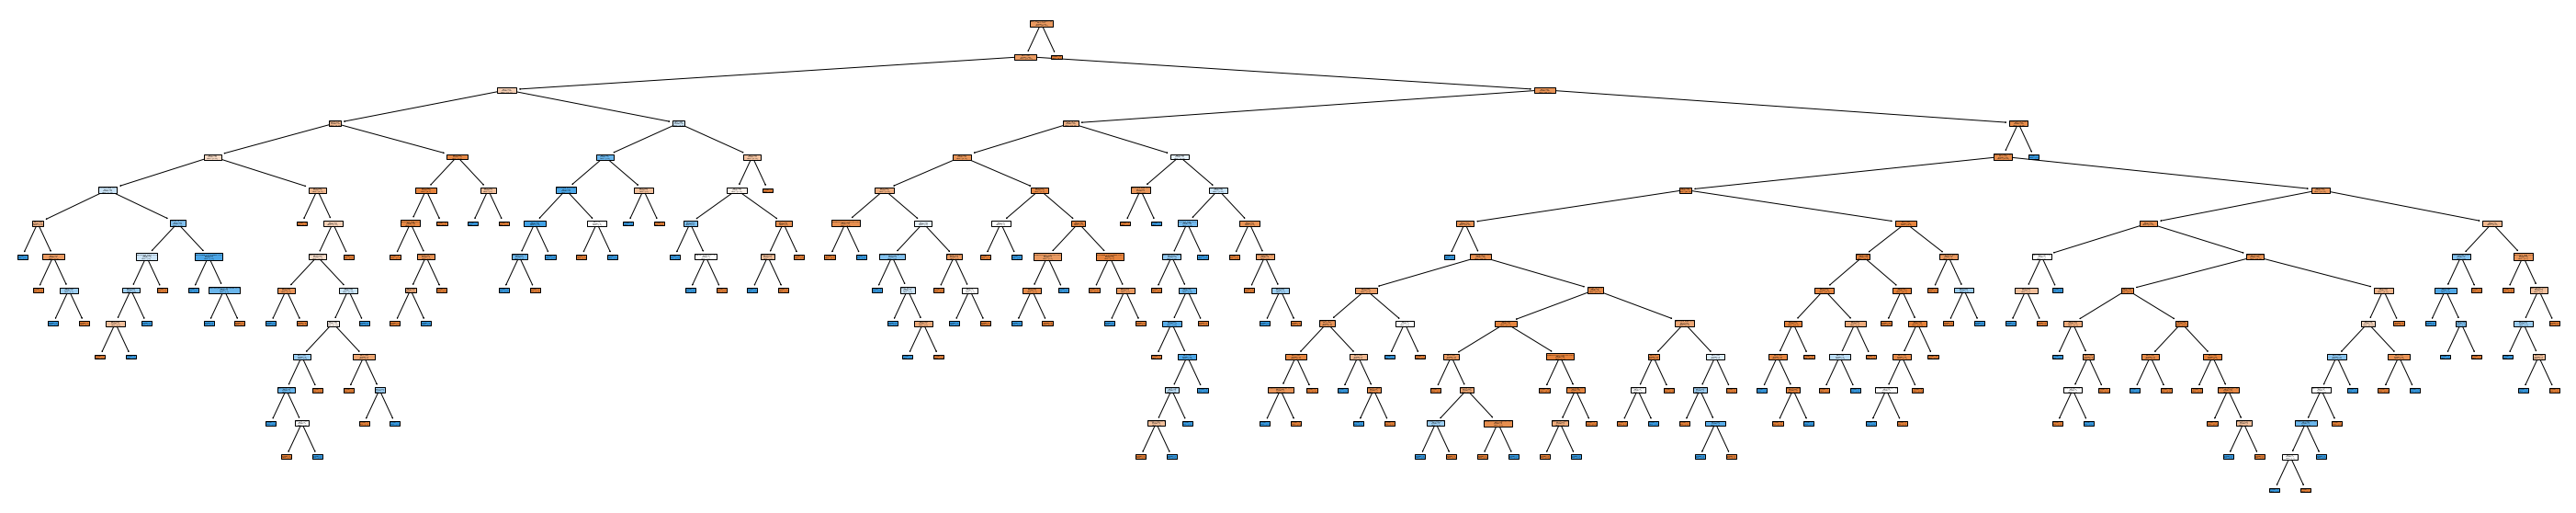

In [21]:
drawtree(rf2.estimators_[0],xtrain.columns)

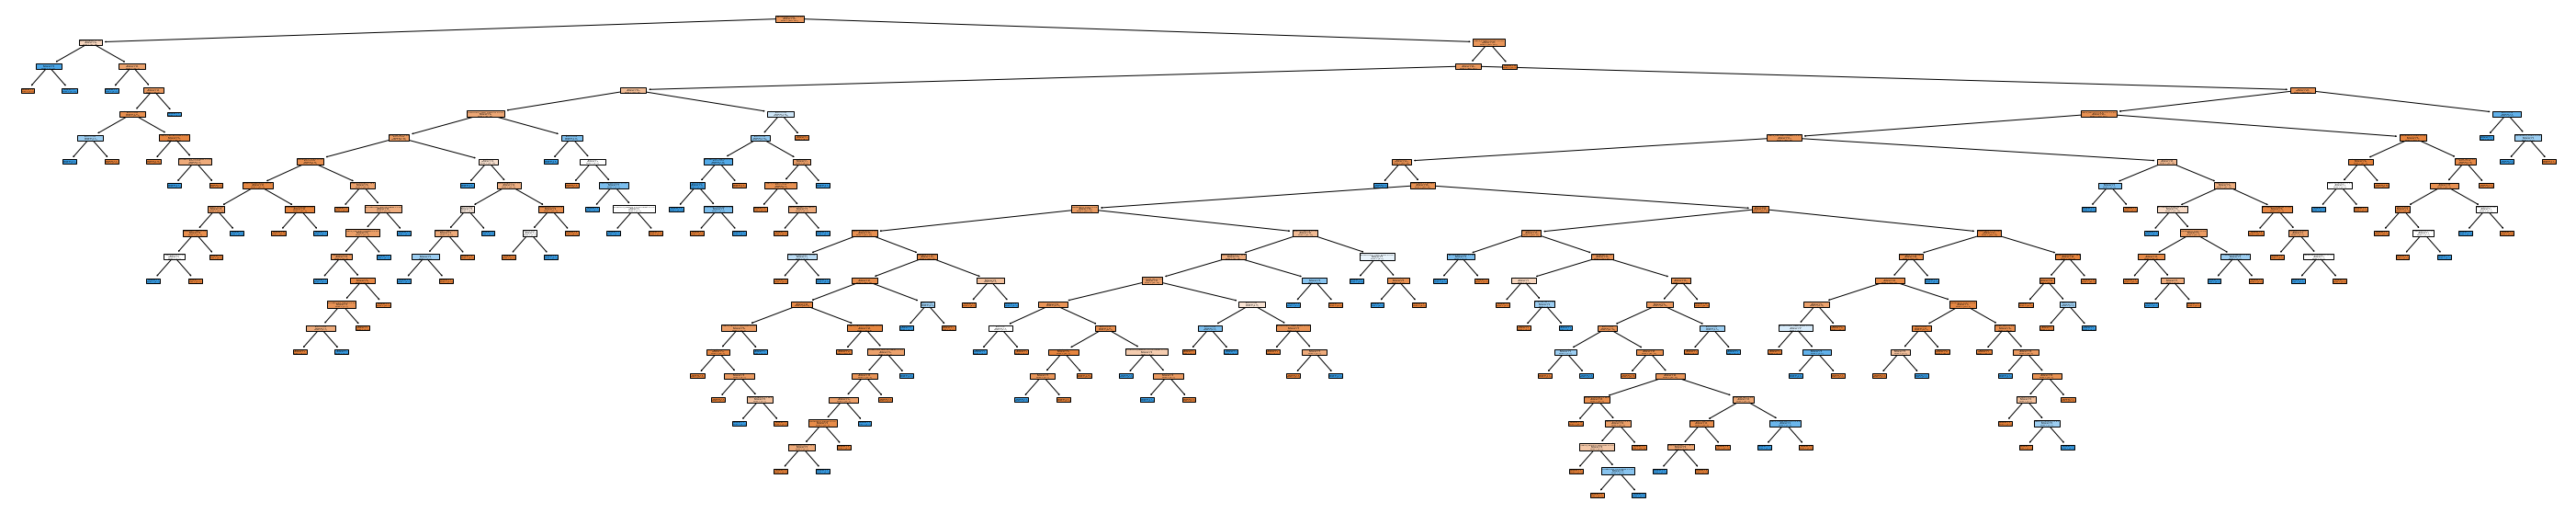

In [22]:
drawtree(rf2.estimators_[1],xtrain.columns)

<AxesSubplot:>

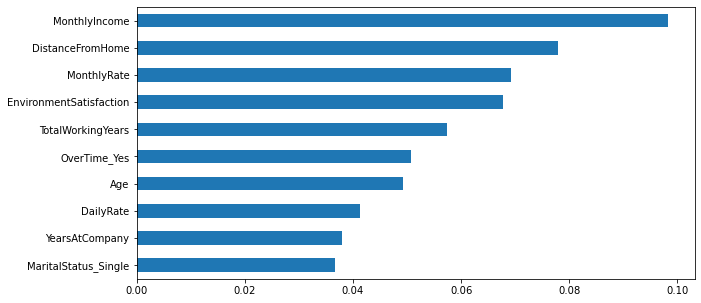

In [23]:
pd.Series(rf2.estimators_[0].feature_importances_, index=xtrain.columns).sort_values(ascending=False).head(10)[::-1].plot.barh(figsize=(10,5))


<AxesSubplot:>

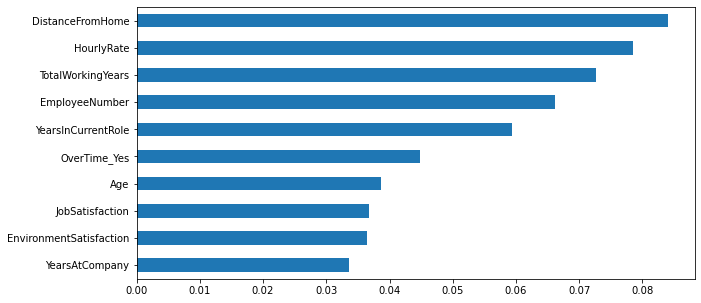

In [24]:
pd.Series(rf2.estimators_[1].feature_importances_, index=xtrain.columns).sort_values(ascending=False).head(10)[::-1].plot.barh(figsize=(10,5))


# Plot a horizonal-bar chart to display important columns using '.feature_importances_' and without using 'max_depth' parameters for entire random forest

<AxesSubplot:>

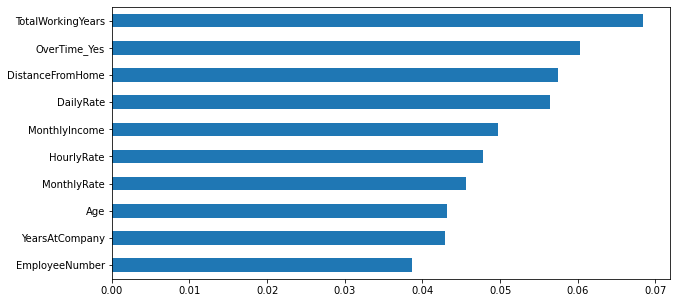

In [25]:
pd.Series(rf2.feature_importances_, index=xtrain.columns).sort_values(ascending=False).head(10)[::-1].plot.barh(figsize=(10,5))
# removed '.estimators_' parameter after rf2

# Predict individual classes for the data 

In [22]:
ypred = rf2.predict(xtest)
ypred[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

* Above results 0 at index 0 means emp will stay in the org
* 1 at index 1 means emp will leave the org
* In Random Forests prediction - it will try to work with every decision tree 
* For e.g if we take one test sample, it will try to predict what could be the target class using all decision trees of RF
* Which means that in above result for every test sample we have 5 predictions 

# Display predict probabilities for entire RF

In [27]:
pred_prob = rf2.predict_proba(xtest)
pred_prob[:10]

array([[0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2]])

* In above results - column_0 represents class 0 and column_1 represents class 1
* class 0 - emp stays (e.g-> 0.8)
* class 1 - emp leaves (e.g-> 0.2)

# Extract probability values from individual decision trees for 1st test sample

In [28]:
for x in rf2.estimators_:
    print(x.predict_proba(xtest)[0])

[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]


/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without f

- [1. 0.] - 1st DT predicts emp stays
- [0. 1.] - 2nd DT predicts emp leaves
- [1. 0.] - Rest DT predicts emp stays
- [1. 0.]
- [1. 0.]

### Calculations of probability:
*  taking sum of all probability values from every DT for that col (class 0) and dividing it by no of DT
* E.g -> 1+0+1+1+1 = 4
* No of DT = 5 
* Prob for **class_0** = 4/5 -> 0.8
* Prob for **class_1** = 1-Prob for **class_0** or 1/5 from col 2 

**Note**- In RF we built multiple DT and tried to take avg of all predictions to report only one result 
* Averaging reduces the **variance** in the model
* By growing the DT completely, **bias** will come down in all the DTrees  

# Build a RF to know exact no of DTs using 'RandomizedSearchCV'

In [26]:
params = {'n_estimators':list(range(1,100))}
rf3 = RandomForestClassifier() 
rscv = RandomizedSearchCV(estimator=rf3, param_distributions=params, cv=5, return_train_score=True, random_state=1).fit(xtrain, ytrain)


In [27]:
rscv.best_estimator_

RandomForestClassifier(n_estimators=33)

In [28]:
df_rscv = pd.DataFrame(rscv.cv_results_)
df_rscv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.137767,0.006366,0.010911,0.002824,93,{'n_estimators': 93},0.843220,0.863830,0.859574,0.859574,...,0.857155,0.007159,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.122303,0.003075,0.008648,0.000346,84,{'n_estimators': 84},0.860169,0.880851,0.859574,0.851064,...,0.861396,0.010266,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.048287,0.001014,0.004126,0.000125,33,{'n_estimators': 33},0.855932,0.880851,0.863830,0.863830,...,0.864803,0.008549,1,1.000000,0.998937,0.998937,1.000000,1.000000,0.999575,0.000521
3,0.114652,0.002371,0.008219,0.000220,81,{'n_estimators': 81},0.847458,0.863830,0.872340,0.859574,...,0.859704,0.008318,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.109536,0.000856,0.008331,0.000928,79,{'n_estimators': 79},0.855932,0.872340,0.859574,0.868085,...,0.862250,0.006797,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.026452,0.000309,0.002807,0.000066,18,{'n_estimators': 18},0.847458,0.859574,0.855319,0.859574,...,0.853747,0.005623,10,0.995745,0.995749,0.997875,0.992561,0.996812,0.995748,0.001778
6,0.051169,0.000639,0.004290,0.000026,36,{'n_estimators': 36},0.838983,0.868085,0.851064,0.855319,...,0.855456,0.010201,8,0.998936,1.000000,1.000000,1.000000,0.998937,0.999575,0.000521
7,0.114292,0.001447,0.008193,0.000136,82,{'n_estimators': 82},0.851695,0.872340,0.855319,0.868085,...,0.861403,0.007732,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.122984,0.000967,0.009127,0.000768,89,{'n_estimators': 89},0.843220,0.855319,0.859574,0.855319,...,0.853750,0.005517,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.127446,0.000969,0.009245,0.000457,92,{'n_estimators': 92},0.855932,0.868085,0.859574,0.863830,...,0.857995,0.008730,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


### Plot the train error vs test error to know optimal 'n_estimators'

In [29]:
df_rscv = df_rscv.sort_values('param_n_estimators')
df_rscv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.026452,0.000309,0.002807,0.000066,18,{'n_estimators': 18},0.847458,0.859574,0.855319,0.859574,...,0.853747,0.005623,10,0.995745,0.995749,0.997875,0.992561,0.996812,0.995748,0.001778
2,0.048287,0.001014,0.004126,0.000125,33,{'n_estimators': 33},0.855932,0.880851,0.863830,0.863830,...,0.864803,0.008549,1,1.000000,0.998937,0.998937,1.000000,1.000000,0.999575,0.000521
6,0.051169,0.000639,0.004290,0.000026,36,{'n_estimators': 36},0.838983,0.868085,0.851064,0.855319,...,0.855456,0.010201,8,0.998936,1.000000,1.000000,1.000000,0.998937,0.999575,0.000521
4,0.109536,0.000856,0.008331,0.000928,79,{'n_estimators': 79},0.855932,0.872340,0.859574,0.868085,...,0.862250,0.006797,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.114652,0.002371,0.008219,0.000220,81,{'n_estimators': 81},0.847458,0.863830,0.872340,0.859574,...,0.859704,0.008318,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.114292,0.001447,0.008193,0.000136,82,{'n_estimators': 82},0.851695,0.872340,0.855319,0.868085,...,0.861403,0.007732,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.122303,0.003075,0.008648,0.000346,84,{'n_estimators': 84},0.860169,0.880851,0.859574,0.851064,...,0.861396,0.010266,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.122984,0.000967,0.009127,0.000768,89,{'n_estimators': 89},0.843220,0.855319,0.859574,0.855319,...,0.853750,0.005517,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.127446,0.000969,0.009245,0.000457,92,{'n_estimators': 92},0.855932,0.868085,0.859574,0.863830,...,0.857995,0.008730,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
0,0.137767,0.006366,0.010911,0.002824,93,{'n_estimators': 93},0.843220,0.863830,0.859574,0.859574,...,0.857155,0.007159,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


# PLot training and testing scores

(0.0, 1.1)

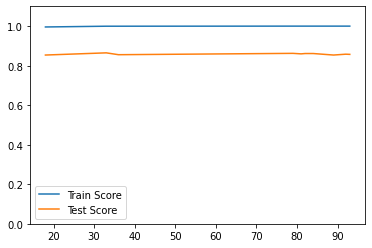

In [30]:
plt.plot(df_rscv['param_n_estimators'], df_rscv['mean_train_score'])
plt.plot(df_rscv['param_n_estimators'], df_rscv['mean_test_score'])
plt.legend(['Train Score', 'Test Score'])
plt.ylim(0,1.1)

* From above graph we can see that around 10 estimators are best for the model and beyond 10, both train and test scores are not improving anymore

# Build a RF with a specific range to know exact no of DTs using 'GridSearchCV'

In [31]:
params = {'n_estimators':list(range(2,20))}
rf4 = RandomForestClassifier() 
gscv = GridSearchCV(estimator=rf4, param_grid=params, cv=5, return_train_score=True).fit(xtrain, ytrain)

In [32]:
df_gscv = pd.DataFrame(gscv.cv_results_)
df_gscv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006239,0.000771,0.001976,0.000373,2,{'n_estimators': 2},0.855932,0.829787,0.838298,0.846809,...,0.843527,0.008849,16,0.932979,0.924548,0.924548,0.934113,0.924548,0.928147,0.004422
1,0.006225,0.000546,0.001573,0.000121,3,{'n_estimators': 3},0.817797,0.804255,0.817021,0.808511,...,0.812070,0.005129,18,0.963830,0.964931,0.974495,0.963868,0.972370,0.967899,0.004585
2,0.007394,0.000444,0.001752,0.000225,4,{'n_estimators': 4},0.860169,0.863830,0.855319,0.851064,...,0.855438,0.006106,10,0.960638,0.946865,0.967056,0.940489,0.967056,0.956421,0.010855
3,0.008661,0.000117,0.001858,0.000386,5,{'n_estimators': 5},0.830508,0.859574,0.838298,0.838298,...,0.840995,0.009767,17,0.972340,0.981934,0.985122,0.977683,0.980871,0.979590,0.004334
4,0.010807,0.002012,0.001806,0.000161,6,{'n_estimators': 6},0.838983,0.863830,0.855319,0.855319,...,0.852052,0.008466,13,0.972340,0.968119,0.969182,0.967056,0.970244,0.969388,0.001819
5,0.012030,0.000815,0.001876,0.000036,7,{'n_estimators': 7},0.860169,0.868085,0.834043,0.829787,...,0.847779,0.014691,15,0.982979,0.985122,0.984060,0.990436,0.989373,0.986394,0.002964
6,0.012738,0.000310,0.001897,0.000007,8,{'n_estimators': 8},0.847458,0.851064,0.838298,0.868085,...,0.847789,0.011847,14,0.976596,0.982997,0.971307,0.980871,0.969182,0.976191,0.005317
7,0.014357,0.000433,0.002089,0.000234,9,{'n_estimators': 9},0.838983,0.859574,0.880851,0.842553,...,0.858009,0.015663,8,0.988298,0.991498,0.989373,0.980871,0.990436,0.988095,0.003766
8,0.015995,0.000366,0.002162,0.000098,10,{'n_estimators': 10},0.860169,0.863830,0.859574,0.851064,...,0.858842,0.004200,6,0.976596,0.981934,0.976621,0.982997,0.984060,0.980441,0.003201
9,0.019256,0.000904,0.002529,0.000461,11,{'n_estimators': 11},0.868644,0.859574,0.851064,0.868085,...,0.858835,0.008802,7,0.986170,0.993624,0.990436,0.989373,0.995749,0.991070,0.003338


### Plot the train error vs test error to know optimal 'n_estimators'

In [33]:
df_gscv = df_gscv.sort_values('param_n_estimators')
df_gscv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006239,0.000771,0.001976,0.000373,2,{'n_estimators': 2},0.855932,0.829787,0.838298,0.846809,...,0.843527,0.008849,16,0.932979,0.924548,0.924548,0.934113,0.924548,0.928147,0.004422
1,0.006225,0.000546,0.001573,0.000121,3,{'n_estimators': 3},0.817797,0.804255,0.817021,0.808511,...,0.812070,0.005129,18,0.963830,0.964931,0.974495,0.963868,0.972370,0.967899,0.004585
2,0.007394,0.000444,0.001752,0.000225,4,{'n_estimators': 4},0.860169,0.863830,0.855319,0.851064,...,0.855438,0.006106,10,0.960638,0.946865,0.967056,0.940489,0.967056,0.956421,0.010855
3,0.008661,0.000117,0.001858,0.000386,5,{'n_estimators': 5},0.830508,0.859574,0.838298,0.838298,...,0.840995,0.009767,17,0.972340,0.981934,0.985122,0.977683,0.980871,0.979590,0.004334
4,0.010807,0.002012,0.001806,0.000161,6,{'n_estimators': 6},0.838983,0.863830,0.855319,0.855319,...,0.852052,0.008466,13,0.972340,0.968119,0.969182,0.967056,0.970244,0.969388,0.001819
5,0.012030,0.000815,0.001876,0.000036,7,{'n_estimators': 7},0.860169,0.868085,0.834043,0.829787,...,0.847779,0.014691,15,0.982979,0.985122,0.984060,0.990436,0.989373,0.986394,0.002964
6,0.012738,0.000310,0.001897,0.000007,8,{'n_estimators': 8},0.847458,0.851064,0.838298,0.868085,...,0.847789,0.011847,14,0.976596,0.982997,0.971307,0.980871,0.969182,0.976191,0.005317
7,0.014357,0.000433,0.002089,0.000234,9,{'n_estimators': 9},0.838983,0.859574,0.880851,0.842553,...,0.858009,0.015663,8,0.988298,0.991498,0.989373,0.980871,0.990436,0.988095,0.003766
8,0.015995,0.000366,0.002162,0.000098,10,{'n_estimators': 10},0.860169,0.863830,0.859574,0.851064,...,0.858842,0.004200,6,0.976596,0.981934,0.976621,0.982997,0.984060,0.980441,0.003201
9,0.019256,0.000904,0.002529,0.000461,11,{'n_estimators': 11},0.868644,0.859574,0.851064,0.868085,...,0.858835,0.008802,7,0.986170,0.993624,0.990436,0.989373,0.995749,0.991070,0.003338


(0.0, 1.1)

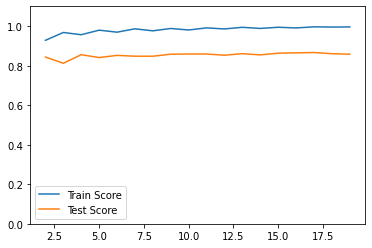

In [34]:
plt.plot(df_gscv['param_n_estimators'], df_gscv['mean_train_score'])
plt.plot(df_gscv['param_n_estimators'], df_gscv['mean_test_score'])
plt.legend(['Train Score', 'Test Score'])
plt.ylim(0,1.1)

# Find best no of estimators

In [35]:
gscv.best_params_ # to know best no of estimators

{'n_estimators': 17}

# Calc accuracy score via best DT 

In [36]:
ypred = gscv.best_estimator_.predict(xtest)
accuracy_score(ytest, ypred)

0.8061224489795918

In [58]:
#*********************************************************************************************************************#

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, random_state=0)
gb.fit(xtrain, ytrain)
gb.score(xtest, ytest)

0.8333333333333334

In [38]:
ypred = gb.predict(xtest)
ypred[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
pred_prob = gb.predict_proba(xtest)
pred_prob[:10]

array([[0.9189261 , 0.0810739 ],
       [0.06606116, 0.93393884],
       [0.43487311, 0.56512689],
       [0.69806318, 0.30193682],
       [0.8785274 , 0.1214726 ],
       [0.96158968, 0.03841032],
       [0.92100267, 0.07899733],
       [0.86806118, 0.13193882],
       [0.91026727, 0.08973273],
       [0.9352927 , 0.0647073 ]])

In [40]:
from sklearn.metrics import roc_curve, f1_score, auc
f1_score(ytest, ypred)

0.3950617283950617

In [41]:
prob_positive = pred_prob[:,1] 
prob_positive
fpr, tpr, threshold = roc_curve(ytest, prob_positive)
roc_auc = auc(fpr, tpr)

In [42]:
def plot_roc(roc_auc, fpr, tpr): 
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'red', label= 'AUC%0.2f'%roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

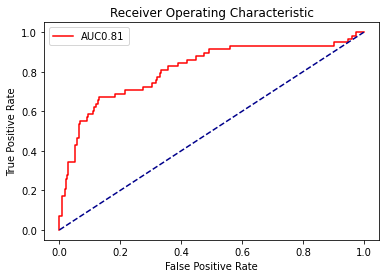

In [43]:
plot_roc(roc_auc, fpr, tpr)